# Kapitel 9: Plotten und Visualisieren

McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*. 2. Auflage. Sebastopol, CA [u. a.]: O’Reilly.

Überarbeitet: armin.baenziger@zhaw.ch, 2. März 2020

- Informative Visualisierungen (Plots) sind eine der wichtigsten Aufgaben in der Datenanalyse. 
- Es kann ein Teil des explorativen Prozesses sein - zum Beispiel, um Ausreisser oder benötigte Datentransformationen zu identifizieren oder um Ideen für Modelle zu generieren. 
- In der Regel sollten Sie niemals mit der Erstellung von Modellen beginnen, bevor Sie die Daten visualisiert und die Beziehungen der Variablen studiert haben. 
- Die Visualisierung ist auch ein leistungsfähiges Werkzeug für die Präsentation von Ergebnissen und zur Ermittlung von Problemquellen für Analysen.
- Wir werden in diesem Notebook insbesondere die Möglichkeiten der *Datenvisualisierung mit Pandas* studieren. Das Lehrmittel beschäftigt sich eingehender mit *Matplotlib*, auf welcher die Pandas-Plotfunktionen aufbauen. **Somit unterscheidet sich die Struktur und der Inhalt dieses Notebooks wesentlich vom Lehrmittel.**
- Das Kapitel wird mit einigen Exkursen abgeschlossen, insbesondere einem kurzen Einblick in die die Bibliothek *Seaborn*, welche speziell für die statistische Daten-Visualisierung entwickelt wurde.

In [ ]:
%autosave 0

In [2]:
# Wichtige Bibliotheken mit üblichen Abkürzungen laden:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Importkonvention für matplotlib.pyplot

Hinweis: **`matplotlib.pyplot`** ist eine Sammlung von Funktionen, die Matplotlib wie MATLAB funktionieren lassen.

- Damit die Plots im Notebook erscheinen, führt man den "Magic Command" `%matplotlib inline` aus.
- Für *interaktives* Plotten im Jupyter-Notebook ist `%matplotlib notebook` sehr gut geeignet.

In [3]:
%matplotlib inline

## Themen
- Wichtige Darstellungsformen
- Plot-Ästhetik
- Darstellungsmöglichkeiten bei mehr als zwei-dimensionalen Daten

## Wichtige Darstellungsformen

Häufig verwendete Darstellungsformen sind in Pandas `plot`-Methode implementiert. Insbesondere sind dies:
- Liniendiagramm ('line' : line plot (default))
- Säulendiagramm ('bar' : vertical bar plot)
- Balkendiagramm ('barh' : horizontal bar plot)
- Histogramm ('hist' : histogram)
- Boxplot ('box' : boxplot)
- Kernel-Density-Plot ('kde' oder 'density')
- Kreisdiagramm ('pie' : pie plot)
- Streudiagramm ('scatter' : scatter plot)

### Liniendiagramm (`kind='line'`)
Mit dem Liniendiagramm (Zeitreihenplot) werden üblicherweise Entwicklungen von Variablen über die Zeit dargestellt. Betrachten wir die Entwicklung von drei Aktienkursen: Apple, Microsoft und Exxon Mobile.

In [4]:
Kurse = pd.read_csv('../examples/stock_px_2.csv', index_col=0, parse_dates=True)
Kurse = Kurse.loc['2008', 'AAPL':'XOM']
Kurse.head()

,AAPL,MSFT,XOM
2008-01-02,194.84,32.49,85.75
2008-01-03,194.93,32.62,86.04
2008-01-04,180.05,31.71,84.44
2008-01-07,177.64,31.92,83.65
2008-01-08,171.25,30.85,82.58


#### Liniendiagramm einer Series:
Drei equivalente Möglichkeiten in Pandas:
```python
Kurse.AAPL.plot(kind='line')
Kurse.AAPL.plot.line()
Kurse.AAPL.plot()
```
`kind='line'` ist die Default-Plot-Methode von Pandas.

<AxesSubplot:>

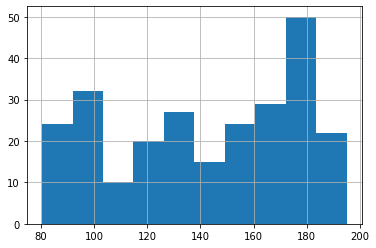

In [7]:
Kurse.AAPL.hist()

In [8]:
Kurse2 = Kurse.copy()

In [19]:
Kurse2.columns = ['ABC', 'GE', 'JNJ']

In [20]:
Kurse2

,ABC,GE,JNJ
2008-01-02,194.84,32.49,85.75
2008-01-03,194.93,32.62,86.04
2008-01-04,180.05,31.71,84.44
2008-01-07,177.64,31.92,83.65
2008-01-08,171.25,30.85,82.58
...,...,...,...
2008-12-24,85.04,18.01,70.87
2008-12-26,85.81,17.97,72.18
2008-12-29,86.61,17.81,72.96
2008-12-30,86.29,18.17,73.49


In [25]:
x = pd.concat([Kurse, Kurse2], axis=1)
x

,AAPL,MSFT,XOM,ABC,GE,JNJ
2008-01-02,194.84,32.49,85.75,194.84,32.49,85.75
2008-01-03,194.93,32.62,86.04,194.93,32.62,86.04
2008-01-04,180.05,31.71,84.44,180.05,31.71,84.44
2008-01-07,177.64,31.92,83.65,177.64,31.92,83.65
2008-01-08,171.25,30.85,82.58,171.25,30.85,82.58
...,...,...,...,...,...,...
2008-12-24,85.04,18.01,70.87,85.04,18.01,70.87
2008-12-26,85.81,17.97,72.18,85.81,17.97,72.18
2008-12-29,86.61,17.81,72.96,86.61,17.81,72.96
2008-12-30,86.29,18.17,73.49,86.29,18.17,73.49


In [27]:
x['APLc'] = x.AAPL.pct_change()

In [30]:
x[x.APLc < 0]['2008'].AAPL

C:\Users\danie\AppData\Local\Temp/ipykernel_24640/304612952.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x[x.APLc < 0]['2008'].AAPL


2008-01-04    180.05
2008-01-07    177.64
2008-01-08    171.25
2008-01-10    178.02
2008-01-11    172.69
               ...  
2008-12-17     89.16
2008-12-22     85.74
2008-12-24     85.04
2008-12-30     86.29
2008-12-31     85.35
Name: AAPL, Length: 128, dtype: float64

In [32]:
x.AAPL.autocorr()

0.9900825518840752

Einige Argumente der `plot`-Methode:

In [ ]:
Kurse.AAPL.plot(figsize=(8,5), 
    title='Kursentwicklung von Apple (AAPL)',   # Titel
    grid=True,       # Gitternetz
    ylim=[0, 225],   # y-Achsengrenzwerte (von 0 bis 225)
    style='r--',     # rote (r) gestrichelte (--) Linie
    rot=50)          # x-Achsenbeschriftung um 50 Grad rottiert

#### Liniendiagramm mehrerer Series:
Es ist auch möglich, ein DataFrame der Plot-Funktion zu übergeben:

In [ ]:
Kurse.plot()

In [ ]:
# Oder separate Plots:
Kurse.plot(figsize=(5, 6), grid=True, subplots=True);
# Der Strichpunkt verhindert, dass unnötige Informationen
# ausgegeben werden. Probieren Sie es aus! Alternativ kann 
# man plt.show() auf der folgenden Zeile verwenden.

In [ ]:
# Oder umbasiert für besseren Vergleich (alle starten bei 100):
(Kurse/Kurse.iloc[0]*100).plot(rot=50);

**Kontrollfragen:**

In [ ]:
# Gegeben: Kursdaten von 2008 
Kurse.tail()

In [ ]:
# Aufgabe 1: Stellen Sie die Kursentwicklung von Microsoft (MSFT) 
# im Jahre 2008 mit einem Liniendiagramm dar.


In [ ]:
# Aufgabe 2 (anspruchsvoller): Stellen Sie die Kursentwicklung 
# von Microsoft (MSFT) und Apple (AAPL) im Jahre 2008 mit einem 
# Liniendiagramm dar. Normieren Sie dabei beide Anfangskure auf 1.


### Säulen- und Balkendiagramm (`kind='bar'` bzw. `kind='barh'`)
- Säulendiagramme (oder Balkendiagramme) werden verwendet, um die absolute oder relative Häufigkeit eindeutiger Werte einer *kategorialen* Variablen (oder einer metrischen mit wenigen Ausprägungen) aufzuzeigen. Die Höhe der Säulen (Länge der Balken) stellt die Häufigkeit für jede eindeutige Kategorie der Variablen dar.
- Üblicherweise muss man die Häufigkeiten zuerst ermitteln. Hierzu dient die Pandas-Methode `value_counts`.
- Zur Veranschaulichung verwenden wir den Datensatz "Titanic" (im csv-Format) im Ordner "weitere_Daten". Informationen zum Datensatz finden Sie unter: https://cran.r-project.org/web/packages/PASWR/PASWR.pdf

In [ ]:
# Für neuere Pandas-Versionen:
Titanic = pd.concat([pd.read_csv('../weitere_Daten/titanic_train.csv'), 
                     pd.read_csv('../weitere_Daten/titanic_test.csv')], 
                    sort=True)
# Für ältere Pandas-Versionen: ohne sort=True
Titanic.sort_values('Name', inplace=True)
Titanic.reset_index(inplace=True)
Titanic.head()

In [ ]:
# Häufigkeitsverteilung der Passagier-Klasse
Tabelle = Titanic.Pclass.value_counts()  
Tabelle
# In der 3. Klasse gab es 709 Passagiere usw. 

In [ ]:
# Die Sortierung nach dem Index ist hier sinnvoller:
Tabelle.sort_index(inplace=True)
Tabelle.index.name = 'Passagierklasse'
Tabelle

#### Zwei equivalente Möglichkeiten in Pandas, Säulendiagramme darzustellen:
```python
tab.plot(kind='bar')
tab.plot.bar()
```


In [ ]:
Tabelle.plot.bar(rot=0,
        title='Verteilung nach Passagierklasse');

Die $x$-Achsenbeschriftung wird automatisch vom Indextitel übernommen (`Tabelle.index.name`). Alternativ können beide Achsen wie folgt neu beschriftet werden:

In [ ]:
Tabelle.plot.bar(rot=0,
        title='Verteilung nach Passagierklasse')
plt.xlabel('Klasse')
plt.ylabel('Anzahl Passagiere');

Statt Säulendiagramme (`bar`) können auch Balkendiagramme (`barh`) erstellt werden.

In [ ]:
Tabelle.plot.barh(title=
      'Verteilung nach Passagier-Klasse')
plt.xlabel('Anzahl Passagiere');

#### Gruppiertes Säulendiagramm

Ausgangspunkt eins gruppierten oder gestapelten Säulendiagramms ist eine Kreuztabelle (Kontingenztafel).

In [ ]:
# Die Funktion crosstab() wird in Kap. 10 besprochen!
Tabelle2 = pd.crosstab(index=Titanic.Pclass, 
                       columns=Titanic.Survived)
Tabelle2

In [ ]:
# Im Folgenden passen wir die Überschriften an:
Tabelle2.index.name = 'Passagierklasse'
Tabelle2.rename(columns={0: 'nein', 1: 'ja'}, inplace=True)
Tabelle2.columns.name = 'überlebt'
Tabelle2

Aus der Kreuztabelle kann nun sehr einfach ein gruppiertes Säulendiagramm erstellt werden.

In [ ]:
Tabelle2.plot.bar(rot=0, title=('Untergang der Titanic'));

Wir erkennen, dass es deutlich mehr Passagiere in der 3. Klasse gab wie in der 1. oder 2. Insbesondere erkennen wir auch, dass in der 3. Klasse ein geringerer Teil der Passagiere überlebt hat.  

Wir können

In [ ]:
Tabelle2.T.plot.bar(rot=0);    # Transponieren mit .T

#### Gestapeltes Säulendiagramm
Alternativ können wir die Kreuztabelle auch mit einem gestapelten Säulendiagramm darstellen. Hierzu verwenden wir das Argument `stacked=True`.

In [ ]:
Tabelle2.plot.bar(rot=0, stacked=True);

In dieser Darstellung sieht man die insgesamte Anzahl Passagiere nach Klasse und die *Anteile* der Passagiere, die überlebt haben, deutlicher.

**Kontrollfrage**

In [ ]:
# Gegeben: Holding Period Returns 2008
HPR = Kurse.iloc[-1]/Kurse.iloc[0] - 1
HPR = HPR * 100   # in Prozent
HPR

In [ ]:
# Stellen Sie die Holding Period Returns der 
# drei Aktien in einem Säulendiagramm dar.


## Histogramme (`kind='hist'`)
- Histogramme stellen die Verteilung *metrischer* Variablen dar, welche stetig (oder diskret mit sehr vielen Ausprägungen) sind, so dass man sinnvollerweise *Klassen* bildet. 
- Während ein Balkendiagramm die Häufigkeit eindeutiger Kategorien anzeigt, zeigt ein Histogramm die Anzahl der Ausprägungen innerhalb einer Klasse (Bin).
- Zur Veranschaulichung verwenden wir den Datensatz "auto.csv" im Ordner "weitere_Daten". Informationen zum Datensatz finden Sie unter https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Auto.html.

In [ ]:
Auto = pd.read_csv('../weitere_Daten/auto.csv', sep=';')
Auto.head()

Die Variable `origin` zeigt, aus welcher Region das Auto stammt. Die Variable ist kategorisch und wird im folgenden korrekt codiert:

In [ ]:
mapping = {1: 'USA', 2: 'Europa', 3: 'Japan'}
Auto['origin'] = Auto.origin.replace(mapping).astype('category')
Auto.head()

Betrachten wir zuerst einige deskriptive Statistiken zum DataFrame. Die ersten sieben Variablen sind metrisch und die letzten zwei nominalskaliert. 

In [ ]:
Auto.iloc[:, :7].describe()

In [ ]:
Auto.iloc[:, -2:].describe()

Wir erstellen nun ein Histogramm der Spalte `mpg`.

In [ ]:
Auto.mpg.plot.hist(title='Kraftstoffeffizienz')
plt.xlabel('Meilen pro Gallone')  # eigene Beschriftung der x-Achse
plt.ylabel('Häufigkeit');         # eigene Beschriftung der y-Achse

Das Histogramm zeigt, dass die Verteilung rechtsschief ist. Viele Autos im Datensatz haben einen relativ hohen Verbrauch (also wenige Meilen pro Gallone). Daneben gibt es einige wenige sehr effiziente Autos.

---
***Exkurs:***

Mit Kernel-Density-Plots kann man mehrere Verteilungen besser in einem Diagramm darstellen, da Histogramme sich gegenseitig überdecken. Beachten Sie, dass wir bei mehr als einem Plot pro Abbildung die Plots auf eine gemeinsame Achse (hier `ax` genannt) binden müssen.

In [ ]:
ax = Auto[Auto.origin=='USA'].mpg.plot.density(title='Kraftstoffeffizienz', 
                                               label='US-Autos')
ax = Auto[Auto.origin!='USA'].mpg.plot.density(label='nicht US-Autos')
ax.set_xlabel('Meilen pro Gallone')
ax.set_ylabel('Dichte')
ax.legend();   # Damit erhalten wir eine Legende.

Die Darstellung belegt, dass US-Autos im Durchschnitt weniger Energie-effizient sind als europäische und japanische Autos.

**Ende des Exkurses**
***

**Kontrollfragen:**

In [ ]:
# Gegeben:
Tagesrenditen = Kurse.pct_change().dropna()
Tagesrenditen.head()

In [ ]:
# Aufgabe 1: Erstellen Sie Histogramme der Tagesrenditen der drei Aktien.


In [ ]:
# Aufgabe 2: Was bewirken die Argumente der Methode "hist" in der folgenden Zeile?
Tagesrenditen.hist(figsize=(8,10), sharex=True, layout=(3,1))
plt.xlabel('Tagesrenditen 2008');
# figsize=(8,10): Antwort
# sharex=True:    Antwort
# layout=(3,1):   Antwort

## Boxplots
- Boxplots, auch Box- und Wisker-Plots genannt, sind eine weitere Möglichkeit, die Verteilung von Datenwerten zu visualisieren. In dieser Hinsicht sind Boxplots mit Histogrammen vergleichbar, unterscheiden sich jedoch in der Darstellung stark.
- Die mittleren 50% der Datenwerte sind in der Box enthalten. Der Medianwert wird mit einem Balken innerhalb der Box angezeigt. Der grösste Teil der Daten liegt zwischen den Enden der "Fühler" (Wiskers). Ausreisser werden durch Symbole jenseits der Fühler angezeigt.
- Ein Boxplot ist somit eine graphische Darstellung der "Five-Number Summary" (Minimum, 1. Quartil, Median, 3. Quartil, Maximum).
- Boxplots eignen sich, **mehrere Verteilungen in einem Diagramm einander gegenüberzustellen**. 
- Bei *gruppierten Boxplots* werden meist Boxplots pro Ausprägung einer kategorialen Variable im Datensatz dargestellt. **Auf diese Weise können zwei Dimensionen des Datensatzes veranschaulicht werden.**

In [ ]:
Auto.boxplot(column='mpg');  # oder: Auto.mpg.plot(kind='box')

Wie erwähnt ist ein Boxplot eine graphische Darstellung der "Five-Number Summary" (siehe nächste Zeile), also vom Minimum (min), dem 1. Quartil (25%), dem Median (50%), dem 3. Quartil (75%) und vom Maximum (max).

In [ ]:
Auto.mpg.describe()

#### Gruppierter Boxplot
Mit Boxplots können wir sehr kompakt und übersichtlich unterschiedliche Verteilungen vergleichen.

In [ ]:
Auto.boxplot(column='mpg', by='origin');

Bei diesem Diagramm müssen wir noch an der Ästhetik arbeiten. :-)

In [ ]:
Auto.boxplot(column='mpg', by='origin')
plt.title('"Meilen pro Gallone" nach Herkunft')
plt.xlabel('')
plt.ylabel('Meilen pro Gallone')
plt.suptitle('');

Es zeigt sich, dass Autos aus Japan Kraftstoff-effizienter sind als Autos aus Europa und diese wieder effizienter sind als Autos aus den USA. 

**Kontrollfrage:**

In [ ]:
# Gegeben:
Tagesrenditen.head()

In [ ]:
# Aufgabe: Stellen Sie die drei Renditeverteilungen mit Boxplots dar. 


### Streudiagramme
Streudiagramme eignen sich, um die *Beziehung* zwischen zwei Datenreihen zu untersuchen.

In [ ]:
Auto.plot.scatter('weight', 'acceleration');
# weight: Gewicht des Fahrzeugs in Pfund
# acceleration: Sekunden bis 60 mph (ca. 97 kmh)

Befund: Schwere Autos tendieren eine bessere Beschleunigung zu haben. Überraschend?
- Bei der explorativen Datenanalyse ist es hilfreich, alle Streudiagramme einer Gruppe von Variablen betrachten zu können.
- So ein Diagramm wird als **Streudiagramm-Matrix (scatter matrix) oder "Pairs-Plot"** bezeichnet.

In [ ]:
auto = Auto[['weight', 'horsepower', 'acceleration']]
pd.plotting.scatter_matrix(auto, figsize=(8,8))
plt.show()

- Auf der Diagnonalen haben wir die Histogramme der drei Variablen. Die restlichen Diagramme sind Streudiagramme. In der obersten Zeile, zweie Spalte, haben wir beispielsweise den Zusammenhang zwischen `horsepower` und `weight`. 
- Dieses Streudiagramm verdeutlicht, dass schwere Autos mehr PS haben. Der Zusammenhang ist dabei stark. 
- Zudem ist der Zusammenhang zwischen PS und Beschleunigung, wie erwartet, negativ (negativ, da Beschleunigung gemessen ist als Anzahl Sek. bis 60mph erreicht ist). 
- Somit erklärt sich auch, warum grosse Autos (trotz dem hohen Gewicht) tendenziell besser beschleunigen. Sie haben typischerweise mehr PS.
- Die Korrelationsmatrix drückt diesen Sachverhalt numerisch aus:

In [ ]:
auto.corr().round(2)   # round(2) für Anzahl Dezimalstellen

Die Korrelationen auf der Hauptdiagonalen sind Korrelationen der Variablen mit sich selber und daher 1. Die Korrelation zwischen `horsepower` und `weight` ist 0.86, also hoch, wie das Streudiagramm oben gezeigt hat.

**Kontrollfrage:**

In [ ]:
# Gegeben:
Tagesrenditen.head()

In [ ]:
# Aufgabe 1: Stellen Sie die Tagesrenditen von 
# Apple und Microsoft in einem Streudiagramm dar.


***
***Abschliessende Exkurse:***
## Seaborn
- *Pandas* selbst verfügt über viele integrierte Methoden, die das Erstellen von Visualisierungen aus DataFrame- und Series-Objekten vereinfachen, wie wir gesehen haben. 
- Dabei greift Pandas auf Funktionalitäten der Grafikbibliothek *Matplotlib" zurück (https://matplotlib.org/). 
- Eine weitere Bibliothek ist die statistische Grafikbibliothek *Seaborn* (https://seaborn.pydata.org/).
- Seaborn vereinfacht die Erstellung vieler gängiger Visualisierungstypen.
- Durch das Importieren von Seaborn werden die Standard-Matplotlib-Farbschemata und Plot-Stile geändert, um die Lesbarkeit und Ästhetik zu verbessern. Selbst wenn man die Seaborn-API nicht verwendet, kann Seaborn als einfache Möglichkeit zur Verbesserung der visuellen Ästhetik allgemeiner Matplotlib-Plots geladen werden.
- Bei Daten, die eine Aggregation oder Zusammenfassung erfordern, bevor ein Diagramm erstellt wird, kann die Verwendung des Seaborn-Pakets die Arbeit erheblich vereinfachen. 

In [ ]:
import seaborn as sns

- Mit Seaborn ist es einfach, eine Streudiagramm-Matrix bzw. einen "Pairs-Plot" zu erstellen. 
- Seaborn liefert hierzu die Funktion `pairplot`, die das Platzieren von Histogrammen oder Kernel-Dichte-Funktionen jeder Variablen entlang der Diagonalen unterstützt.

In [ ]:
sns.pairplot(auto);

#### Höhere Dimensionen
Farbe kann verwendet werden, um eine zusätzliche Dimension in einem Streudiagramm anzuzeigen. Eine kategorische Variable kann mit verschiedenen Farben für die verschiedenen Kategorien angezeigt werden.


Seaborn hat eine praktische **`hue`-Option** (hue, engl. für Farbton), die es uns ermöglicht, den Plot nach zusätzlichen kategorischen Werten (Faktorausprägungen) aufzusplitten. Beispielhaft wird diese Funktionalität im Folgenden mit einem Streudiagramm gezeigt:

In [ ]:
sns.scatterplot(x = 'weight', y = 'mpg', data = Auto, 
                hue = 'origin');

## Plots in Datei speichern
Die aktive Abbildung kann mithilfe von `plt.savefig` in einer Datei gespeichert werden.

```python 
plt.savefig('figpath.svg')
```

- Der Dateityp wird aus der Dateierweiterung abgeleitet (im Beispiel oben eine "Scalable Vector Graphics"). 
- Verwendet man stattdessen .pdf, erhält man ein PDF.
- Will man den Plot als PNG mit 400 DPI ("dots per inch") speichern unter Weglassung der weissen Leerräume rund um das Bild, dann ginge das mit:

```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

## Matplotlib-Konfiguration
- Matplotlib wird mit Farbschemata und Standardeinstellungen konfiguriert, die hauptsächlich darauf ausgerichtet sind, Abbildungen für die Veröffentlichung vorzubereiten. 
- Allerdings kann fast das gesamte Standardverhalten über einen umfangreichen Satz globaler Parameter angepasst werden (z.B. die Abbildungsgrösse, den Abstand zwischen Subplots, Farben, Schriftgrössen, Rasterstile).
- Eine Möglichkeit, die Konfiguration programmgesteuert von Python aus zu ändern, besteht darin, die Methode `rc` zu verwenden. Möchte man beispielsweise die *globale* Grösse von `figure` (den Default) auf 10×10 festlegen, ginge das wie folgt:

```python
plt.rc('figure', figsize=(10, 10))
```

- Das erste Argument für `rc` ist die Komponente, die man anpassen möchte, z. B. "figure", "axes", "xtick", "ytick", "grid", "legend" oder viele andere. 
- Danach kann eine Folge von Schlüsselwortargumenten folgen, die die neuen Parameter angeben. 

- Für eine umfassendere Anpassung und um eine Liste aller Optionen zu sehen (inkl. kurzen Erklärungen!) kann die Konfigurationsdatei *matplotlibrc* im Anaconda-Verzeichnis *Lib\site-packages\matplotlib\mpl-data* bearbeitet bzw. eingesehen werden.
- Die angepasste Konfigutationsdatei (Kopie) sollte im "Home-Directory" im Ordner *.matplotlib* mit gleichem Namen (also *matplotlibrc*) abgelegt werden. 

***Ende der Exkurse.***
***

## Fazit
- Das Ziel dieses Kapitels war es, eine Einführung in die Grundlagen der Datenvisualisierung zu machen.
- Es gibt viele ausgezeichnete Lernressourcen online und in gedruckter Form, um das umfassende Thema zu vertiefen. Beispielsweise:
    - https://matplotlib.org/users/pyplot_tutorial.html
    - https://seaborn.pydata.org/tutorial.html
- Im nächsten Kapitel befassen wir uns mit der Aggregation von Daten und Gruppenoperationen in Pandas.